## Overview:
The data set for this project has been taken from Kaggle. The data set is simple. The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## Dataset:
Iris Flower Dataset: Iris flower data set used for multi-class classification.<br>
https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.

- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Import the data into pandas dataframe
try: 
    iris = pd.read_csv('Data/iris.csv')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


In [3]:
# Checking the first five rows of the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking the last five rows of the data
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data Exploration
In this stage, we explore the data with different techniques..

In [5]:
# Checking the rows and columns of the dataset
print(f"The number of rows are {iris.shape[0]} and the number of columns are {iris.shape[1]}")

The number of rows are 150 and the number of columns are 5


In [6]:
# Getting more insights of the data using .info() method
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Statistic of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Let's check if the data set has any missing values.

In [8]:
# Chcek Missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is no missing value present in the dataset.

#### Exploring target feature

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

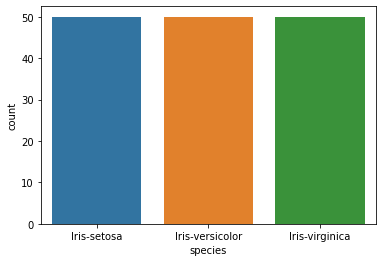

In [9]:
sns.countplot(x='species', data=iris)
iris['species'].value_counts()

There are same amount of values present in category or class that's why the dataset is also not the imbalance one.

#### Exploring the Other features other than the target feature

In [10]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

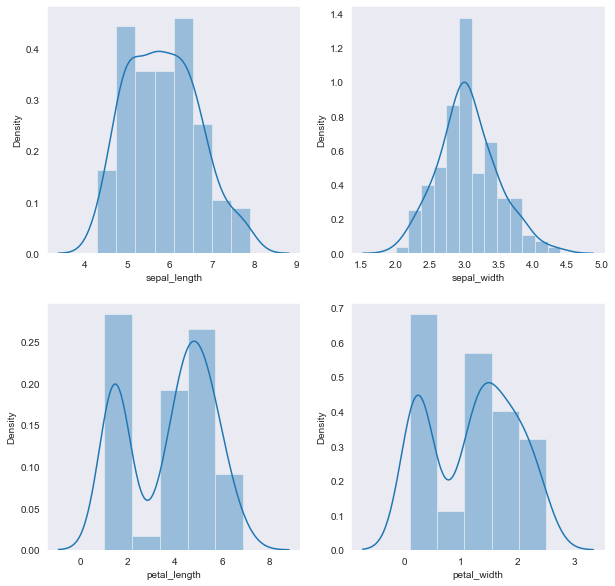

In [11]:
sns.set_style('dark')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
count = 0
for i in range(2):
    for j in range(2):
        sns.distplot(iris[iris.columns[count]], ax=ax[i,j])
        count+=1

As we can see, most of the data is normally distributed.

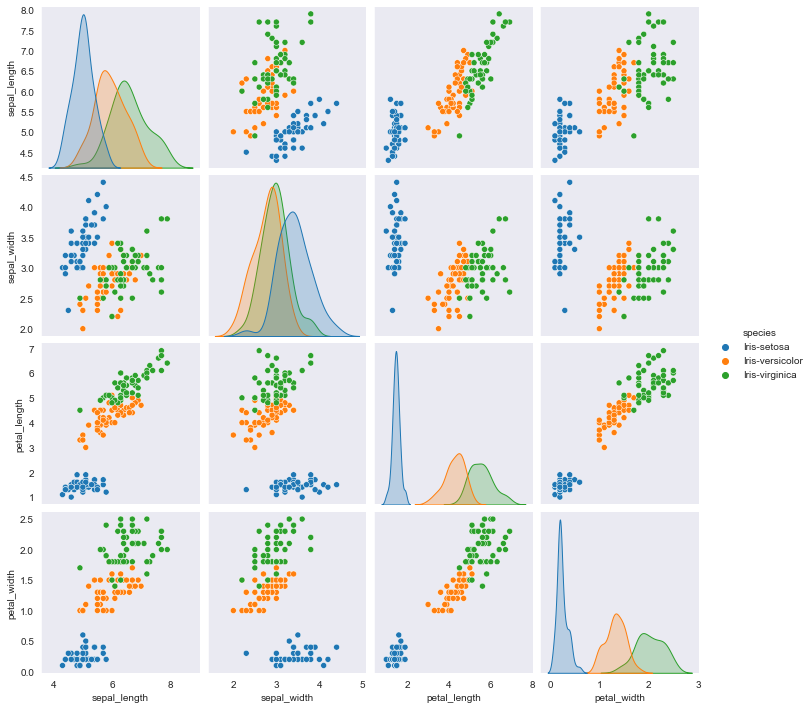

In [12]:
# Chcek the distribution of the feature with respect to other feature
sns.pairplot(iris, hue='species', kind='scatter')

<AxesSubplot:>

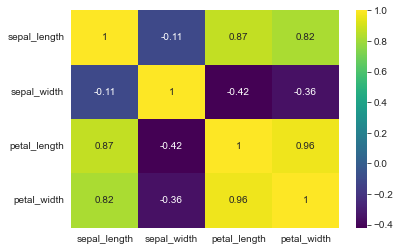

In [13]:
# correlation plot
corr = iris.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

Some of the features are strongly positive correlated and the other are strongly negative correlated.

## Step 04: Data Pre-Processing
Make data ready for Machine Learning model...

In [14]:
# Separate the other features and the target fetaures
X = iris.drop(columns=['species'])
y = iris['species']

In [15]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [17]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


## Step 6: Train the Model using Linear Regression 

In [19]:
# Creating the instance of the Linear regressio
cls = DecisionTreeClassifier()

In [20]:
# Train the model
cls.fit(X_train, y_train)
print("Training is done successfully..")

Training is done successfully..


In [21]:
# make prediction on test data
y_pred = cls.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [22]:
# Printing confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [23]:
# function to print differnet performace scores
def score(y_test, y_pred):
    different_score = {
        "Accuarcy Score" : accuracy_score(y_test, y_pred),
        "Precision Score" : precision_score(y_test, y_pred, average='weighted'),
        "Recall Score" : recall_score(y_test, y_pred, average='weighted'),
        "F1 Score" : f1_score(y_test, y_pred, average='weighted')
    }
    return different_score

In [24]:
# Printing differnet performace scores
score(y_test, y_pred)

{'Accuarcy Score': 1.0,
 'Precision Score': 1.0,
 'Recall Score': 1.0,
 'F1 Score': 1.0}

In [25]:
# Printing classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
# Saving the result
result = pd.DataFrame({'y_test':np.array(y_test).reshape(len(y_test)), 'y_pred':y_pred}, index=range(len(y_pred)))
result.to_csv('IRIS flower classification model result.csv')

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.

In [27]:
# Save the model to disk
pickle.dump(cls, open('IRIS flower classification model.pickle', 'wb'))

## Summary
Now our model is ready and whenever we need to do classification, we just need load the model using pickle and can do classification.